# LINEAR REGRESSION TO PREDICT CHANCE OF ADMISSION

In [50]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
df=pd.read_csv("G:\\data\\Admission_Prediction.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
df1=df.copy()

In [5]:
df1.shape

(500, 9)

In [6]:
df1.describe(include="all")

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
#Filling Up Missing Values

df1["GRE Score"]=df1["GRE Score"].fillna(df1["GRE Score"].mean())
df1["TOEFL Score"]=df1["TOEFL Score"].fillna(df1["TOEFL Score"].mean())
df1["University Rating"]=df1["University Rating"].fillna(df1["University Rating"].median())


In [8]:
df1.describe(include="all")

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
#Dropping the Serial Number collumn

df1=df1.drop(columns=["Serial No."],axis=1)


In [10]:
df1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


In [11]:
df1.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

C:\Users\Ranajay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ranajay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ranajay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

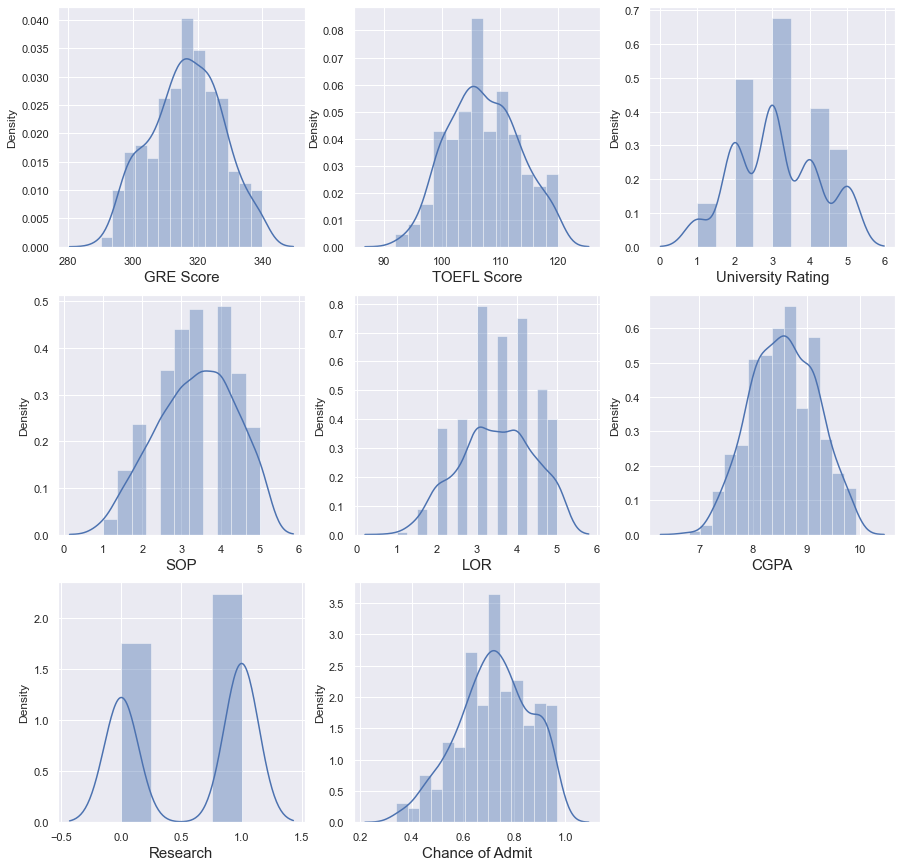

In [14]:
#Plotting the histogram of features to gain idea about the normality

plt.figure(figsize=(15,15))
plotnumber =1

for i in df1:
    if plotnumber<=15:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df1[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
 

In [41]:
df1.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [15]:
#Dividing the dataset into independent and dependant variables
y=df1["Chance of Admit"]
X=df1.drop(columns=["Chance of Admit"],axis=1)

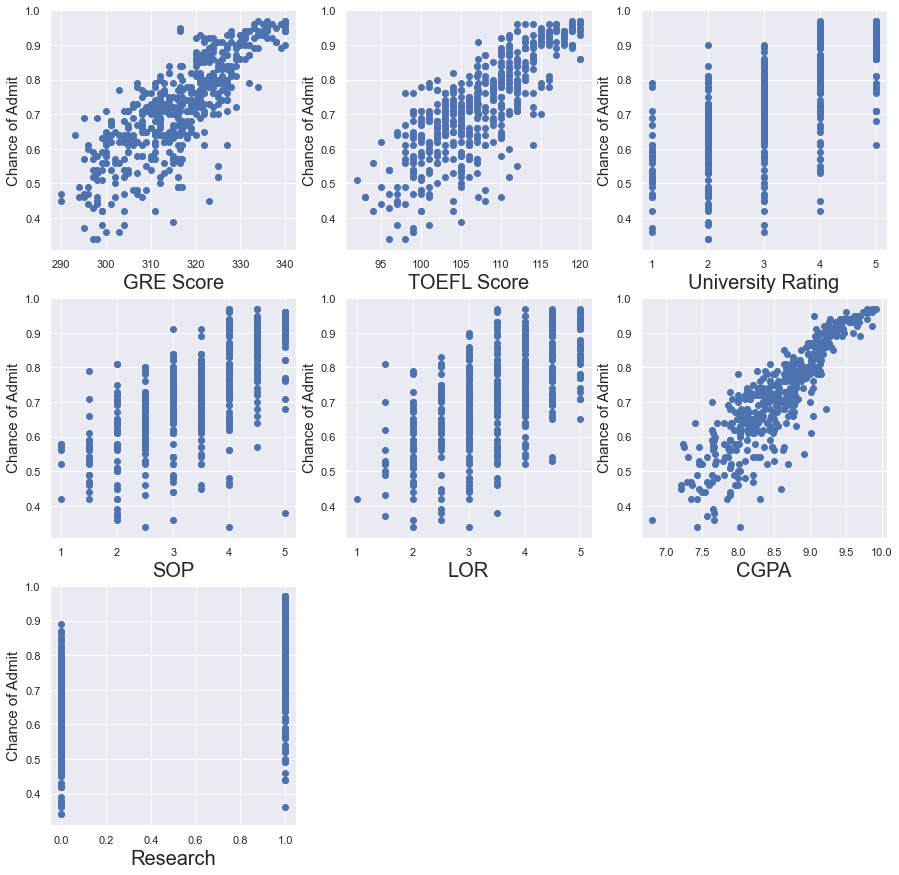

In [16]:
#Scatterplots between X and y

plt.figure(figsize=(15,15))
plotnumber=1

for column in X:
    if plotnumber<=15:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel("Chance of Admit",fontsize=15)
    plotnumber+=1

More or less linear.

In [64]:
#Standardizing the data.

scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [18]:
#Multicollinearity check

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

# Finally, I would like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [19]:
vif

,VIF,Features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


As a thumb rule, a VIF value greater than 10 means a very severe multicollinearity.We do not have any vif value>10 in this case

In [58]:
#Training and Testing

X_train, x_test, y_train, y_test= train_test_split(X_scaled,y,test_size=0.25,random_state=355)

In [59]:
#Fitting the training set into a linear regression model

regression= LinearRegression()

regression.fit(X_train,y_train)

LinearRegression()

In [22]:
#Let us make a function to find Adjusted R-square

def adj_R2(a,b):
    R2=regression.score(a,b)
    n= a.shape[0]
    k= a.shape[1]
    adj_R2= 1-(1-R2)*(n-1)/(n-k-1)
    return adj_R2
    
    

In [23]:
#Finding R-squared and #Adjusted R-squared for the training set

score=pd.DataFrame()

score["Method"]=["R2","Adj R2"]
score["Value"]=[regression.score(X_train,y_train),adj_R2(X_train,y_train)]

score

,Method,Value
0,R2,0.841525
1,Adj R2,0.838502


We find that there is negligible difference between R2 and Adjusted R2.Thus we are not being penalized by use of any feature

In [24]:
#Finding the score for Test Data to look for overfitting:

score["Method"]=["R2","Adj R2"]
score["Value"]=[regression.score(x_test,y_test),adj_R2(x_test,y_test)]

score

,Method,Value
0,R2,0.753490
1,Adj R2,0.738741


So it looks like our model R2 and Adjusted R2 score is less on the test data.

So we now check whether model is overfitting our training data

In [25]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations

lassCV= LassoCV(alphas=None,cv=10,normalize=True,max_iter=100000)
lassCV.fit(X_train,y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [26]:
#Best alpha parameter

alpha=lassCV.alpha_
alpha

3.0341655445178153e-05

In [29]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg= Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=3.0341655445178153e-05)

In [30]:
lasso_reg.score(x_test,y_test)

0.7534654960492284

Our r2_score for test data (75.34%) comes same as before using regularization. So, it is fair to say our OLS model did not overfit the data.

In [39]:
#Ridge regression
alphas=np.random.uniform(low=0,high=10,size=(50,))
ridgecv= RidgeCV(alphas=alphas,cv=10,normalize=True)
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([5.44363402, 3.79446854, 2.74096334, 6.46760825, 0.69141592,
       2.80731163, 6.20415048, 9.47276382, 1.61579091, 2.62259262,
       4.57226322, 5.32637038, 4.25159156, 6.40290126, 5.26558927,
       2.93161182, 1.86439956, 9.97643113, 4.44478412, 5.9616184 ,
       5.8715213 , 8.36591981, 4.6817942 , 4.52595432, 4.28679354,
       3.68225933, 2.92358823, 2.72273647, 9.40646618, 7.33988227,
       9.70554947, 7.92125965, 5.87616028, 7.98891612, 5.38693007,
       7.54055143, 4.02228851, 3.26042382, 7.22453208, 0.15530369,
       2.14648996, 6.32663189, 6.83974256, 3.13569903, 3.02515556,
       7.39833411, 9.716825  , 7.51055367, 2.12402105, 9.82824446]),
        cv=10, normalize=True)

In [40]:
ridgecv.alpha_

0.1553036886986936

In [41]:
ridge_model= Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.1553036886986936)

In [42]:
ridge_model.score(x_test,y_test)

0.7535658379570921

We got the same R2 square using Ridge regression as well. So, it's safe to say there is no overfitting.

In [43]:
# Elastic net

elasticCV= ElasticNetCV(alphas=None,cv=10,normalize=True,max_iter=100000)
elasticCV.fit(X_train,y_train)

ElasticNetCV(cv=10, max_iter=100000, normalize=True)

In [44]:
elasticCV.alpha_

6.0683310890356314e-05

In [45]:
# l1_ration gives how close the model is to L1 regularization

elasticCV.l1_ratio

0.5

Above value indicates we are giving equal preference to L1 and L2

In [46]:
elasticnet_reg=ElasticNet(alpha=elasticCV.alpha_, l1_ratio=elasticCV.l1_ratio)
elasticnet_reg.fit(X_train,y_train)

ElasticNet(alpha=6.0683310890356314e-05)

In [47]:
elasticnet_reg.score(x_test,y_test)

0.7534710950712854

So, we can see by using different type of regularization, we still are getting the same r2 score.
That means our OLS model has been well trained over the training data and there is no overfitting.

## Prediction
###  We want to predict the Admission chance for the array [300,110,5,5,5,10,1]

In [61]:
import pickle

In [62]:
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [65]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))
a

array([0.92190162])

In [68]:
#We can also do it directly  without creating a pickle file

regression.predict(scaler.transform([[300,110,5,5,5,10,1]]))

array([0.92190162])

#### So the person with GRE Score=300, TOEFL Score=110, University Rating=5, SOP=5, LOR=5,CGPA=10,Research=1  has a 92% chance of getting admission